# Исследовательский анализ заведений общественного питания Москвы

- Автор: Сенникова Алёна

## Цель и задачи  

**Цель:** Исследовать структуру ресторанного рынка Москвы, определить ключевые характеристики заведений и выявить факторы, влияющие на рейтинг.   

**Задачи:**

1. Загрузить и объединить данные о заведениях и их ценовой политике.  
2. Провести предобработку: оптимизировать типы данных, обработать пропуски и дубликаты.  
3. Выполнить исследовательский анализ (EDA): категории, районы, сетевость, количество мест, рейтинги.  
4. Изучить взаимосвязи рейтинга с ценами, типом заведения, районом и другими признаками.  
5. Сформулировать выводы и рекомендации для успешного позиционирования заведений.


## Данные

Для анализа поступили данные о заведениях общественного питания Москвы. Данные состоят из двух датасетов:

- `rest_info.csv` — общая информация о заведениях (категория, адрес, район, рейтинг, количество мест, сетевость, часы работы);  
- `rest_price.csv` — ценовая информация (средний чек, категория цен, цена чашки кофе).  


## Структура проекта

1. Введение 
2. Предобработка данных     
3. Исследовательский анализ данных   
4. Изучение рейтингов и корреляци1
5. Составление Топ-15 сетей
6. Анализ среднего чека и расположения
7. Общие выводы

---

## Загрузка данных и знакомство с ними

Начнём с загрузки библиотек и датасетов `rest_info` и `rest_price`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `info_df` и `price_df`.

In [1]:
!pip install phik -U

In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
# Выгружаем данные в переменные info_df и price_df
info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые 5 строк методом `head()`, а информацию о датафрейме методом `info()`:

In [4]:
# Выводим первые строки датафрейма на экран
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим информацию о датафрейме
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация основная о заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- В данных представлены как числовые значения - хранятся в типах данных `int64` или `float64`, так и строки - для их хранения используется тип `object`. Значения в столбце `chain` показывают является ли заведение сетевым и содержат значения 1 или 0 - размерность этих данных можно оптимизировать.
- Пропуски содержатся в столбцах `hours` и `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `rest_price.csv`.

In [6]:
# выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке заведений. Можно отметить, что:

- Названия столбцов представлены в едином стиле - snake case.
- Типы данных соответствуют содержимому. Представлены как числовые значения - хранятся в типе данных `float64`, так и строки - для их хранения используется тип `object`.
- Пропусков достаточно много в силу специфики данных, кроме того следует проверить в столбцах значения-индикаторы, которые могут говорить об отсутствии данных.
- Значения в столбцах соответствуют описанию.  

Первичное знакомство показывает, что данные хорошего качества — в них практически нет необоснованно пропущенных значений, а сами данные соответствуют описанию и выглядят корректными.

---

In [8]:
# Объединяем данные двух датасетов в один df
df = info_df.merge(price_df, how = 'left')

In [9]:
# Выводим информацию об объединённом датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Датафреймы успешно объединились в один.

## Предобработка данных

### Оптимизируем типы данных

In [10]:
# Оптимизируем целочисленный тип данных в датафрейме df
df['chain'] = pd.to_numeric(df['chain'], downcast = 'integer')

In [11]:
# Проверяем типы данных в датафрейме info_df с помощью атрибута dtypes
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   int8
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

Тип данных был успешно оптимизирован с понижением размерности целочисленных данных.

---

###  Проверяем наличие пропусков в данных

При первичном анализе мы обнаружили пропуски в столбцах `hours` и `seats` датафрейма `info_df`, а также в каждом из столбцов датафрейма `price_df`. Узнаем абсолютное и относительное количество пропусков в этих столбцах.

In [12]:
# Применяем метод isna() к датафрейму df
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [13]:
# Подсчитываем долю строк с пропусками
df.isna().sum() / df.shape[0]

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

В датафрейме `df` обнаружено 536 пропусков в столбце `hours` - это 6% данных; 3611 пропусков в столбце `seats` - это 43% данных; 5091 пропуска в столбце `price` - это 61% данных; 4590 пропуска в столбце `avg_bill` - это 55% данных; 5257 пропусков в столбце `middle_avg_bill` - это 63% данных; 7871 пропуска в столбце `middle_coffee_cup` - это 94% данных. Количество пропусков достаточно большое, чтобы их просто удалить.

Пропуски в столбцах `hours` и `seats` могут быть вызваны:
- При обработке данных произошёл технический сбой. Технические ошибки могут привести к пропускам в данных. Этот тип пропусков можно отнести к типу MCAR.
- Заведение закрылось к моменту сбора данных и прекратило информировать пользователей о деталях работы, или владельцы не являются активными пользователями Интернета, проверить гипотезу не получится, так как нет данных о работе заведения. Этот тип пропусков можно отнести к типу MNAR.
- Для сетевых заведений информация о часах работы может быть указана не для всех заведений. Такие пропуски можно восстановить по значениям других заведений той же сети. Этот тип пропусков можно отнести к типу MAR.
- Заведения с особыми графиками - круглосуточные или сезонные - также могут иметь пропуск в столбце о времени работы. Стоит просмотреть, к какой категории относятся заведения.
- Часть категорий заведений не предполагает собственных посадочных мест. Для проверки следует посмотреть, в каких категориях встречаются пропуски.

Пропуски в столбцах `middle_coffee_cup` и `middle_avg_bill` нормальны и не требуют обработки, так как содержат значения, характерные не для каждой строки. 

Пропуски в столбцах `price` и `avg_bill` могут быть из-за недавнего открытия заведения, отсутствия меню в интернете или нестандартной ценовой политики. Такие данные заменить невозможно, поэтому следует оставить пропуски.

In [14]:
# Подсчитываем долю пропусков в столбцах hours и seats для каждой категории заведений
df.groupby('category')[['hours', 'seats']].apply(lambda x: x.isna().mean())

,hours,seats
category,,
"бар,паб",0.023529,0.388235
булочная,0.027344,0.421875
быстрое питание,0.054726,0.421227
кафе,0.157696,0.487805
кофейня,0.010616,0.468507
пиццерия,0.007899,0.325434
ресторан,0.036221,0.378365
столовая,0.028571,0.479365


Кафе имеет значительно больше пропусков чем остальные заведения (16% в данных о часах работы и 49% в данных о посадочных местах). 

В целом, пропуски обусловлены особенностями работы заведений, поэтому стоит оставить их для дальнейшего анализа.

In [15]:
# Подсчитываем долю пропусков в столбцах hours и seats для сравнения сетевых заведений и независимых
df.groupby('chain')[['hours', 'seats']].apply(lambda x: x.isna().mean())

,hours,seats
chain,,
0,0.080754,0.448568
1,0.036193,0.398752


Нет зависимости между наличием пропусков в столбцах hours и seats и принадлежности заведения к сети.

Далее проверим, встречаются ли в данных значения-индикаторы, которые можно рассматривать как пропуски.

In [16]:
# Проверяем уникальные значения в столбцах
for column in ['category', 'district', 'rating', 'chain']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце rating:
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5. ]

Уникальные значения в столбце chain:
[0 1]



Все значения выглядят корректными. Теперь можно перейти к изучению дубликатов в данных.

---

### Явные и неявные дубликаты в данных

Проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов:

In [17]:
# Проверяем полные дубликаты в датафрейме df
df.duplicated().sum()

0

В датафрейме нет полных дубликатов строк. Проверим неявные дубликаты — значение названия и адреса заведения должны быть уникальными, то есть каждая строка в данных — уникальное заведение.

Для оптимизации проверки нормализуем данные в текстовых столбцах с названием заведения.

In [18]:
# Приводим все названия заведений к нижнему регистру и удаляем лишние пробелы
df['name'] = df['name'].str.lower().str.strip()

In [19]:
# Выводим неявные дубликаты по полям с названием и адресом заведения
df[df.duplicated(subset = ['name', 'address'], keep = False)]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"Москва, проспект Мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276.0,NaN,NaN,NaN,NaN


В данных есть 3 пары дубликатов, оставляем корректные значения из каждой пары.

In [20]:
# Удаляем строки с некорректными значениями по индексам
df.drop([1511, 2211, 3109])

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN


Неявные дубликаты удалены.

Для дальнейшей работы выделим новый столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7.

In [21]:
# Определяем функцию, которая создаст новый столбец в зависимости от времени работы заведения
def create_24_7(x):
    return (str(x) == 'ежедневно, круглосуточно') 

In [22]:
# Создаём столбец is_24_7 с помощью функции create_24_7
df['is_24_7'] = df['hours'].apply(create_24_7)

In [23]:
# Проверям, какие значения принимает столбец is_24_7
df['is_24_7'].value_counts(normalize = True)

False    0.913157
True     0.086843
Name: is_24_7, dtype: float64

### Промежуточные выводы после предобработки

Предобработка завершена. Предоставленные данные хорошего качества и требуют не так много действий по предобработке. 

В результате предобработки данных были выполнены следующие действия:

- Объедини данные в единый датафрейм df;
- Оптимизировали размерность целочисленных данных;
- Изучены пропуски в данных. Пропуски обнаружились в столбцах `hours` - 6% данных; `seats` - 43% данных; `price` - 61% данных; `avg_bill` 55% данных; `middle_avg_bill` - 63% данных; `middle_coffee_cup` - 94% данных. Учитывая это количество, пропуски могут отражать особенности общественных заведений питания и не являться ошибкой в данных. Поэтому их оставили как есть.
- Данные проверили на явные и неявные дубликаты — удалены 3 строки с неявными дубликатами.

---

## Исследовательский анализ данных


### Какие категории заведений представлены в данных?



In [24]:
# Выводим распределение данных по значениям столбца category
df['category'].value_counts()

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

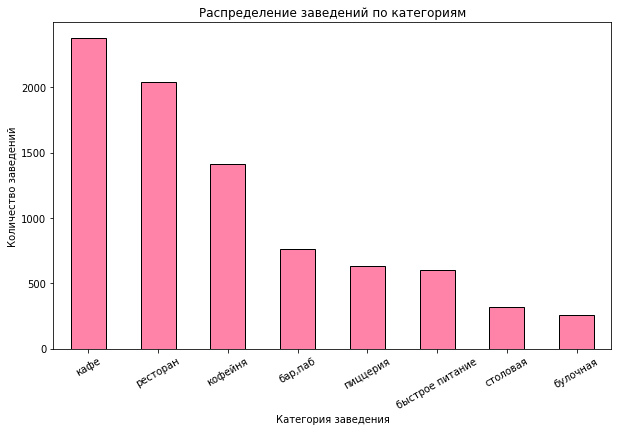

In [25]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize = (10, 6))

# Строим столбчатую диаграмму с помощью pandas
df['category'].value_counts().plot(
                kind = 'bar',
                rot = 30,
                title = 'Распределение заведений по категориям',
                color = '#FF82A9',
                edgecolor='black')

# Настраиваем оформление графика
plt.ylabel('Количество заведений')
plt.xlabel('Категория заведения')

# Выводим график
plt.show()

Всего в данных представлено 8 категорий заведений общественного питания. Наиболее распространённые - **кафе** (2378), **ресторан** (2043) и **кофейня** (1413).

### Какие административные районы Москвы присутствуют в данных?

In [26]:
# Выводим распределение данных по значениям столбца district
df['district'].value_counts().sort_values(ascending = False)

Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

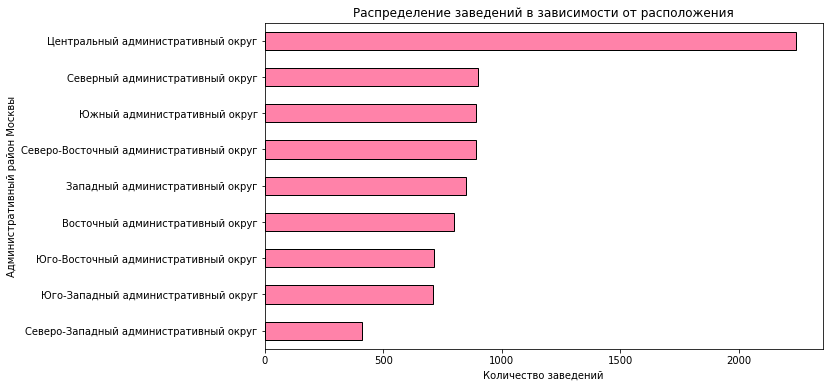

In [27]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize = (10, 6))

# Строим столбчатую диаграмму с помощью pandas
df['district'].value_counts().sort_values().plot(
                kind = 'barh',
                title = 'Распределение заведений в зависимости от расположения',
                color = '#FF82A9',
                edgecolor='black')

# Настраиваем оформление графика
plt.ylabel('Административный район Москвы')
plt.xlabel('Количество заведений')

# Выводим график
plt.show()

Всего в данных содержится 9 административных округов Москвы. В **Центральном административном округе** (2242) находится значительно больше заведений - примерно в 3 раза больше, чем в остальных регионах. Также среди остальных выделяется **Северо-Западный административный округ** (409) - в нем в 2 раза меньше заведений, чем в среднем по районам.

In [28]:
# Исследуем распределение заведений каждой категории в Центральном административном округе Москвы
df[df['district'] == 'Центральный административный округ']['category'].value_counts()

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

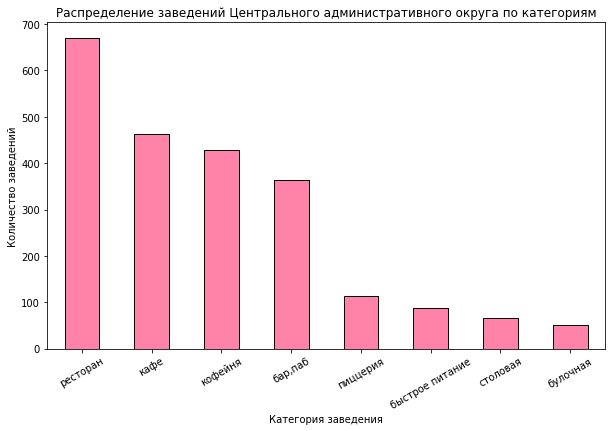

In [29]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize = (10, 6))

# Строим столбчатую диаграмму с помощью pandas
df[df['district'] == 'Центральный административный округ']['category'].value_counts().plot(
                kind = 'bar',
                rot = 30,
                title = 'Распределение заведений Центрального административного округа по категориям',
                color = '#FF82A9',
                edgecolor='black')

# Настраиваем оформление графика
plt.ylabel('Количество заведений')
plt.xlabel('Категория заведения')

# Выводим график
plt.show()

В ЦАО среди заведений общественного питания преобладают **рестораны** (670), также есть большое количество **кафе** (464), **кофеен** (428), **баров, пабов** (364).

### Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми?

In [30]:
# Выводим распределение сетевых/несетевых заведений в долях 
df['chain'].value_counts(normalize = True)

0    0.618725
1    0.381275
Name: chain, dtype: float64

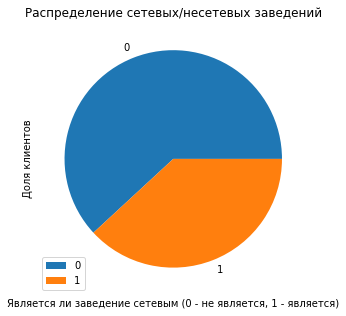

In [31]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим столбчатую диаграмму с помощью pandas 
df['chain'].value_counts(normalize=True).plot(
               kind='pie', # Тип графика — столбчатая диаграмма
               legend=True, # Включаем легенду
               title=f'Распределение сетевых/несетевых заведений'
)

# Настраиваем оформление графика
plt.xlabel('Является ли заведение сетевым (0 - не является, 1 - является)')
plt.ylabel('Доля клиентов')

# Выводим график
plt.show()

Большинство заведений (62%) **не** являются **сетевыми**.

In [32]:
# Выводим распределение сетевых/несетевых заведений в долях для каждой категории
df.groupby('category')['chain'].value_counts(normalize = True)

category         chain
бар,паб          0        0.779085
                 1        0.220915
булочная         1        0.613281
                 0        0.386719
быстрое питание  0        0.615257
                 1        0.384743
кафе             0        0.672414
                 1        0.327586
кофейня          1        0.509554
                 0        0.490446
пиццерия         1        0.521327
                 0        0.478673
ресторан         0        0.642682
                 1        0.357318
столовая         0        0.720635
                 1        0.279365
Name: chain, dtype: float64

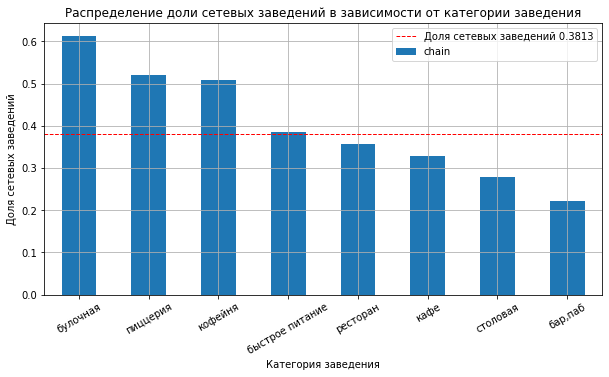

In [33]:
# Строим график столбчатой диаграммы
grouped = df.groupby('category')['chain'].mean().sort_values(ascending=False)
grouped.plot(kind='bar',
               title=f'Распределение доли сетевых заведений в зависимости от категории заведения',
               legend=True,
               ylabel='Доля сетевых заведений',
               xlabel='Категория заведения',
               rot=30,
               figsize=(10, 5))

# Рассчитываем среднее значение по доле сестевых заведений
mean_churn_share = df['chain'].mean()

# Наносим на график линию с средним значением доли сетевых заведений
plt.axhline(mean_churn_share, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Доля сетевых заведений {round(mean_churn_share,4)}')

# Добавляем сетку и легенду
plt.grid()
plt.legend()

# Выводим график
plt.show()

Заметно больше сетевых заведений среди **булочных** (61%), **пиццерий** (52%) и **кофеен** (51%). Сильно реже среднего сетевыми являются **бары, пабы** (22%), **столовые** (28%).

### Исследование количества посадочных мест в заведениях.

In [34]:
# Основные статистические показатели столбца seats
df['seats'].describe()

count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Среднее количество посадочных мест - 108, медиана - 75, максимум - 1288, минимум - 0, стандартное отклонение - 123.
В данных содержатся аномальные значения.

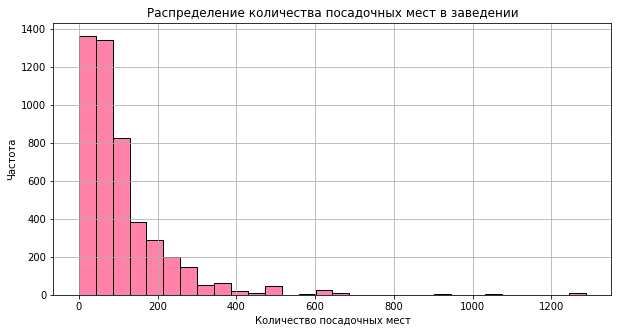

In [35]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize = (10, 5))

# Строим гистограмму с помощью pandas
df['seats'].plot(
            kind = 'hist',
            bins = 30,
            edgecolor = 'black',
            color = '#FF82A9')

# Настраиваем оформление графика
plt.title('Распределение количества посадочных мест в заведении')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')

# Добавляем сетку
plt.grid()

# Выводим график
plt.show()

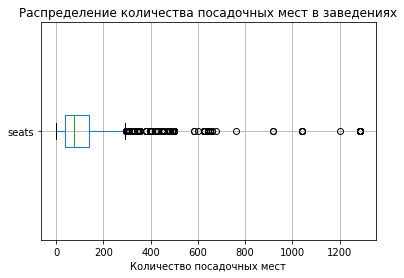

In [36]:
# Строим диаграмму размаха значений в столбце seats
df.boxplot(column = 'seats', vert = False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества посадочных мест в заведениях')
plt.xlabel('Количество посадочных мест')

# Выводим график
plt.show()

В данных содержится большое количество аномальных значений - более 400 посадочных мест. Это могут быть фудкорты/столовые в больших компаниях или ошибки при вводе данных.

In [37]:
# Выводим медианы количества мест для разных типов заведений
df.groupby('category')['seats'].agg(lambda x: x.median()).sort_values()

category
булочная           50.0
пиццерия           55.0
кафе               60.0
быстрое питание    65.0
столовая           75.5
кофейня            80.0
бар,паб            82.5
ресторан           86.0
Name: seats, dtype: float64

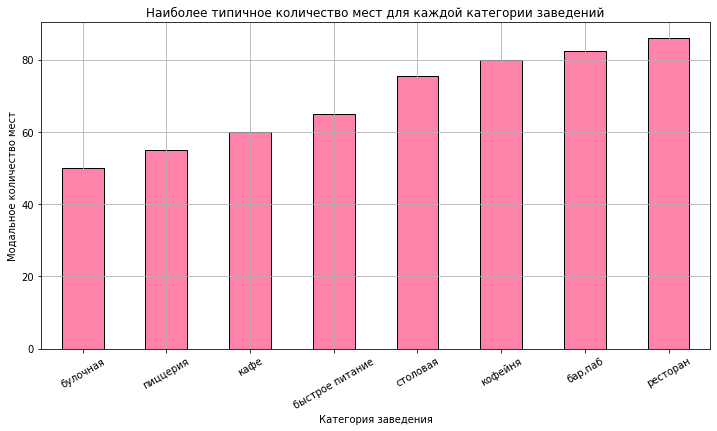

In [38]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize = (12, 6))

# Строим гистограмму с помощью pandas
df.groupby('category')['seats'].agg(lambda x: x.median()).sort_values().plot(
    kind='bar',
    color='#FF82A9',
    edgecolor='black',
    rot = 30
)

# Настраиваем оформление графика
plt.title('Наиболее типичное количество мест для каждой категории заведений')
plt.xlabel('Категория заведения')
plt.ylabel('Модальное количество мест')

# Добавляем сетку
plt.grid()

# Выводим график
plt.show()

Средние значения находятся в диапазоне 50 - 86 мест.
Меньше всего посадочных мест в **булочных**, наибольшее количество в **ресторанах**, что соответствует специфике заведений.

### Исследование рейтингов заведений.

In [39]:
# Выводим средний рейтинг для разных категорий заведений
df.groupby('category')['rating'].agg('mean')

category
бар,паб            4.387712
булочная           4.268359
быстрое питание    4.050249
кафе               4.123886
кофейня            4.277282
пиццерия           4.301264
ресторан           4.290357
столовая           4.211429
Name: rating, dtype: float64

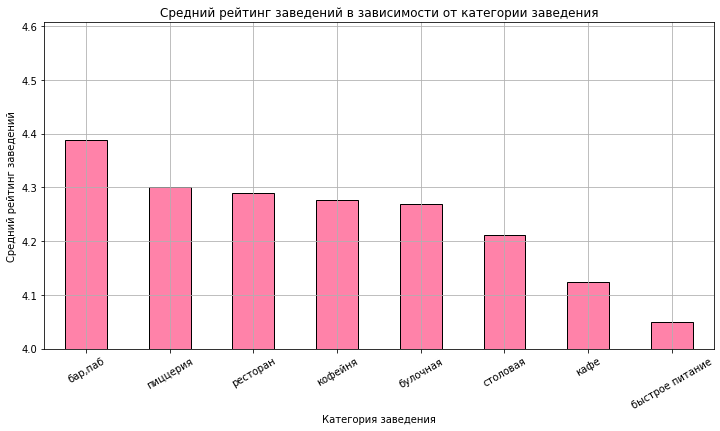

In [40]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize = (12, 6))

# Строим гистограмму с помощью pandas
df.groupby('category')['rating'].agg('mean').sort_values(ascending=False).plot(
    kind='bar',
    color='#FF82A9',
    edgecolor='black',
    rot = 30
)

# Настраиваем оформление графика
plt.title('Средний рейтинг заведений в зависимости от категории заведения')
plt.xlabel('Категория заведения')
plt.ylabel('Средний рейтинг заведений')
plt.ylim(bottom = 4)

# Добавляем сетку
plt.grid()

# Выводим график
plt.show()

Средние рейтинги всех категорий заведений находятся в диапазоне **от 4 до 5**. Самый высокий рейтинг в среднем у **баров, пабов** (4,39), а самый низкий у **быстрого питания** (4,05) и **кафе** (4,12). 

### Корреляция рейтингов заведений с различными данными.

In [41]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['category', 'district', 'chain', 'seats', 'price', 'is_24_7', 'rating']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.220295
district,0.200691
category,0.190003
is_24_7,0.150173
chain,0.108092
seats,0.000000


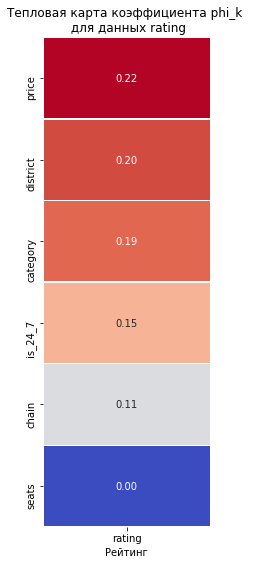

In [42]:
# Строим тепловую карту
plt.figure(figsize=(3, 9))

# Сохраняем матрицу корреляции признака rating с другими признаками 
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг')

# Выводим график
plt.show()

Наибольшая корреляция с рейтингом у полей `price` (0,22), `district` (0,20), `category` (0,19). Круглосуточная работа, принадлежность к сети и размер заведения имеют слабую корреляцию с рейтингом.

Дополнительно рассмотрим связь рейтинга с ценовой категорией.

In [43]:
df.groupby('price')['rating'].median().sort_values(ascending = False)

price
высокие          4.4
выше среднего    4.4
средние          4.3
низкие           4.2
Name: rating, dtype: float64

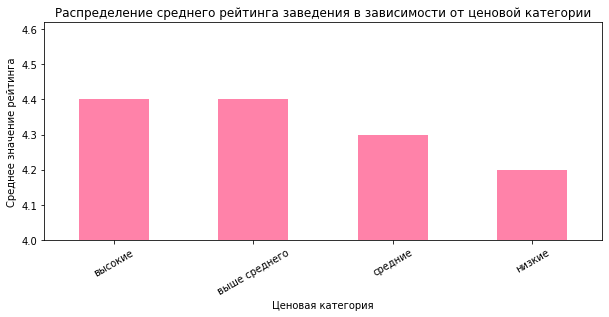

In [44]:
# Создаём фигуру графика
plt.figure(figsize=(10, 4))

# Строим диаграмму 
df.groupby('price')['rating'].median().sort_values(ascending = False).plot(
    kind = 'bar',
    rot = 30,
    color='#FF82A9')

# Настраиваем внешний вид графика и выводим его на экран
plt.ylim(4)
plt.title(f'Распределение среднего рейтинга заведения в зависимости от ценовой категории')
plt.xlabel('Ценовая категория')
plt.ylabel('Среднее значение рейтинга')
plt.show()

Из графика видно, что чем выше ценовая категория, тем выше значения среднего рейтинга. 

### Топ-15 популярных сетей по количеству заведений.

In [45]:
# Группируем данные по названию и добавляем в датафрейм значения среднего рейтинга, количества заведений и наиболее типичной категории
top_df = df.groupby('name').agg({'rating': 'mean', 'name': 'count', 'category': lambda x: x.mode()}).rename(columns={
        'rating': 'avg_rating',
        'name': 'name_count',
        'category': 'chain_category'
    }).sort_values('name_count', ascending=False).head(15).reset_index()

# Выводим сгруппированный датафрейм
top_df

,name,avg_rating,name_count,chain_category
0,кафе,3.880952,189,кафе
1,шоколадница,4.177500,120,кофейня
2,домино'с пицца,4.171429,77,пиццерия
3,додо пицца,4.286486,74,пиццерия
4,one price coffee,4.069444,72,кофейня
5,яндекс лавка,3.872464,69,ресторан
6,cofix,4.075385,65,кофейня
7,prime,4.116000,50,ресторан
8,хинкальная,4.322727,44,кафе
9,шаурма,3.909302,43,быстрое питание


В рейтинг попали заведения под названиями **кафе**, **шаурма**, **ресторан**. Скорее всего это не сеть, а наименования небольших заведений. 
Наиболее популярные категории сетей заведений - **кафе, кофейни, рестораны**.

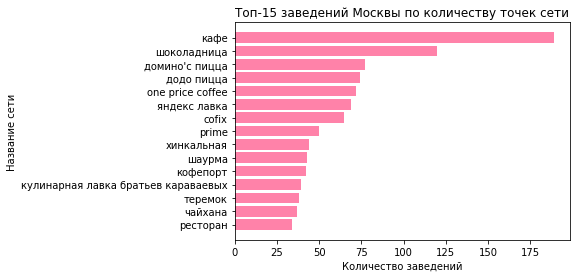

In [46]:
# Строим гистограмму с помощью pandas
plt.barh(
    top_df['name'],        
    top_df['name_count'], 
    color = '#FF82A9'
)

# Настраиваем внешний вид графика и выводим его на экран
plt.title('Топ-15 заведений Москвы по количеству точек сети')
plt.gca().invert_yaxis()
plt.xlabel('Количество заведений')
plt.ylabel('Название сети')
plt.show()

Наибольшее количество точек имеет **Шоколадница** (120), **Домино'с пицца** (77) и **Додо пицца** (74).

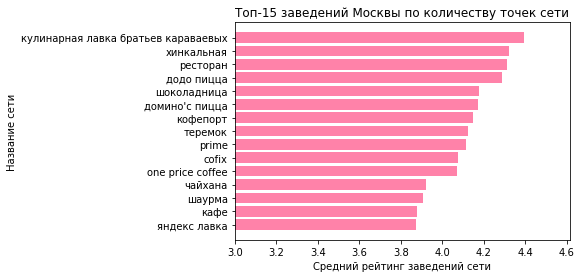

In [47]:
# Сортируем датафрейм по полю avg_rating
top_df = top_df.sort_values('avg_rating')

# Строим гистограмму с помощью pandas
plt.barh(
    top_df['name'],        
    top_df['avg_rating'], 
    color = '#FF82A9'
)

# Настраиваем внешний вид графика и выводим его на экран
plt.title('Топ-15 заведений Москвы по количеству точек сети')
plt.xlim(3)
plt.xlabel('Средний рейтинг заведений сети')
plt.ylabel('Название сети')
plt.show()

Средний рейтинг сетевых заведений не превышает 4.5, наиболее высокий рейтинг имеют **Кулинарная лавка братьев Караваевых** и **Додо пицца**.

### Вариация среднего чека заведения в зависимости от района Москвы.

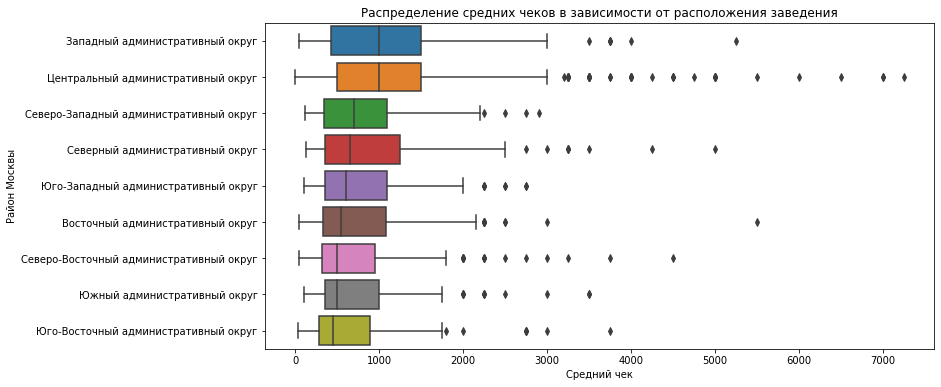

In [48]:
# Создаём фигуру графика
plt.figure(figsize = (12, 6))

# Вычисляем медианы для сортировки
medians = df[df['middle_avg_bill'] < 8000].groupby('district')['middle_avg_bill'].median().sort_values(ascending = False)

# Строим диаграмму размаха значений
sns.boxplot(data = df[df['middle_avg_bill'] < 8000], y = 'district', x = 'middle_avg_bill', order=medians.index)

# Настраиваем внешний вид графика
plt.title('Распределение средних чеков в зависимости от расположения заведения')
plt.xlabel('Средний чек')
plt.ylabel('Район Москвы')

# Выводим график
plt.show()

Средний чек сильно разнится в зависимости от района. Наиболее дорогими можно считать заведения в Центральном, Западном и Северном округах. Большинство значений находятся в диапазоне 200 - 2000.

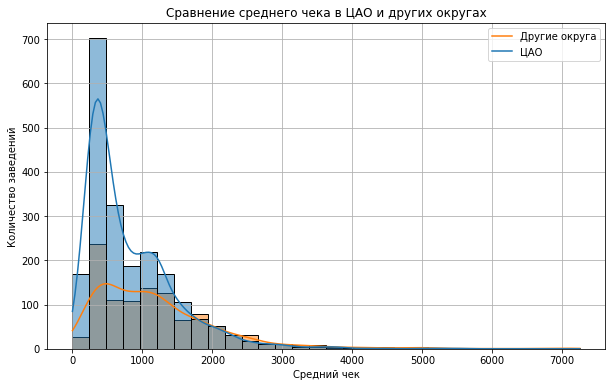

In [49]:
# Создаем столбец, хранящий информацию о принадлежности заведения к ЦАО
df['is_center'] = df['district'] == 'Центральный административный округ'

# Создаём фигуру графика
plt.figure(figsize=(10, 6))

# Строим гистограмму с помощью pandas
sns.histplot(
    data=df[df['middle_avg_bill'] < 8000],
    x='middle_avg_bill',
    hue='is_center',
    bins=30,
    kde=True
)

# Настраиваем внешний вид графика и выводим его на экран
plt.title('Сравнение среднего чека в ЦАО и других округах')
plt.xlabel('Средний чек')
plt.ylabel('Количество заведений')
plt.legend(['Другие округа', 'ЦАО'])
plt.grid()
plt.show()

Средний чек в центральном административном округе имеет ярко выраженную тенденцию к значениям 250 - 500, при этом содержит большое количество очень высоких средних чеков. В целом средний чек в ЦАО выше.

#### Промежуточные выводы

Анализ взаимосвязи данных показал, что:

- Среднее количество посадочных мест - 108, медиана - 75. Средние значения находятся в диапазоне 50 - 86 мест в зависимости от категории заведения.
- Самый высокий рейтинг в среднем у баров, пабов (4,39), а самый низкий у быстрого питания (4,05) и кафе (4,12).
- Наибольшая корреляция с рейтингом у поля price (0,22). Более дорогие заведения получают более высокие оценки - это может быть связано с качеством обслуживания, меню и тд.
- Среди сетей наибольшее количество точек имеет Шоколадница (120), Домино'с пицца (77) и Додо пицца (74).
- Средний чек сильно разнится в зависимости от района. Наиболее дорогими можно считать заведения в Центральном, Западном и Северном округах.

---

## Подведём итоги

В ходе исследования проанализировали данные 8406 заведений общественного питания Москвы. Данные включали основную информацию о заведениях общественного питания и информацию о среднем чеке в них. Акцент исследования был на том, чтобы выявить взаимосвзяи между рейтингом заведений и другими факторами для выявления успешных характеристик.

### Общий профиль заведений общественного питания Москвы

Исследовательский анализ данных позволил сформировать обобщённый профиль заведений Москвы:

- Из 8406 проанализированных заведений около 38% сетевые, остальные - одиночные.

- Большинство заведений расположено в ЦАО.

- Наиболее распространённые категории - кафе, ресторан и кофейня.

- Круглосуточными являются лишь 9% заведений, оставшиеся 91% имеют ограниченный график работы.

- Большинство заведений предоставляет около 50 - 86 посадочных мест, при этом у значительной части информация о посадке отсутствует.

### Факторы, влияющие на рейтинг заведений

На рейтинг заведений влияет сразу несколько факторов, наиболее значимыми факторами оказались:

- категория цен в заведении (заведения с более высоким чеком чаще имеют более высокий рейтинг);

- административный район;

- категория заведения.

Средние рейтинги всех категорий заведений находятся в диапазоне от 4 до 5. Самый высокий рейтинг в среднем у баров, пабов, а самый низкий у быстрого питания и кафе.

### Рекомендации

В качестве рекомендаций стоит обратить особое внимание на категорию заведения и цен - они оказывают наибольшее влияние на рейтинг заведения. Также крайне важно выбрать подходящий район Москвы, так как локация имеет крайне важное значение.
